In [2]:
import math
import numpy as np
import pandas as pd

In [3]:
#读取数据
data = pd.read_excel('附件.xlsx')
data.head()

,x坐标 (m),y坐标 (m)
0,107.250,11.664
1,105.360,23.191
2,102.235,34.447
3,97.911,45.299
4,92.440,55.619


In [4]:
# 将数据转化为矩阵
data = np.array(data)
data

array([[107.25 ,  11.664],
       [105.36 ,  23.191],
       [102.235,  34.447],
       ...,
       [334.636, -40.95 ],
       [336.233, -24.609],
       [337.032,  -8.21 ]])

In [5]:
# 计算每个样本的曼哈顿距离
def manhattan_distance(P1, P2):
    return np.sum(abs(P1 - P2))

# 创建result矩阵，用于存放每个样本之间的曼哈顿距离
result = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        if i < j:
            result[i][j] = manhattan_distance(data[i], data[j])
        else:
            result[i][j] = 0
result

array([[  0.   ,  13.417,  27.798, ..., 280.   , 265.256, 249.656],
       [  0.   ,   0.   ,  14.381, ..., 293.417, 278.673, 263.073],
       [  0.   ,   0.   ,   0.   , ..., 307.798, 293.054, 277.454],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,  17.938,  35.136],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,  17.198],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]])

In [6]:
# 计算每个样本的欧式
def distance(P1, P2):
    return np.sqrt(np.sum((P1 - P2) ** 2))

# 创建result矩阵，用于存放每个样本之间的距离
result = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        if i < j:
            result[i][j] = distance(data[i], data[j])
        else:
            result[i][j] = 0
result

array([[  0.        ,  11.6809173 ,  23.32842288, ..., 233.39371455,
        231.83818671, 230.63985649],
       [  0.        ,   0.        ,  11.68174478, ..., 238.07887781,
        235.76934094, 233.79037274],
       [  0.        ,   0.        ,   0.        , ..., 244.3254641 ,
        241.3351925 , 238.64042168],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         16.41885167,  32.82755574],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  16.41845309],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [7]:
# 把上三角矩阵result转化为对称矩阵
for i in range(len(data)):
    for j in range(len(data)):
        if i > j:
            result[i][j] = result[j][i]
result

array([[  0.        ,  11.6809173 ,  23.32842288, ..., 233.39371455,
        231.83818671, 230.63985649],
       [ 11.6809173 ,   0.        ,  11.68174478, ..., 238.07887781,
        235.76934094, 233.79037274],
       [ 23.32842288,  11.68174478,   0.        , ..., 244.3254641 ,
        241.3351925 , 238.64042168],
       ...,
       [233.39371455, 238.07887781, 244.3254641 , ...,   0.        ,
         16.41885167,  32.82755574],
       [231.83818671, 235.76934094, 241.3351925 , ...,  16.41885167,
          0.        ,  16.41845309],
       [230.63985649, 233.79037274, 238.64042168, ...,  32.82755574,
         16.41845309,   0.        ]])

In [8]:

def judge(distances,i,judge_dis):
    #对于样本i，返回distance中距离i小于judge_dis且不等于0的样本
    #返回的是一个np.array
    return np.where((distances[i - 1] < judge_dis) & (distances[i - 1] != 0))[0] + 1

In [9]:
# 找到矩阵中最小值的位置
def find_min(result):
    min = np.min(result[np.nonzero(result)])
    for i in range(len(result)):
        for j in range(len(result)):
            if result[i][j] == min:
                return i, j

In [10]:
find_min(result)

(12, 13)

In [11]:
judge(result, 1, 50)

array([  2,   3,   4,   5,  55,  56,  57,  58,  59,  60,  61,  62,  63,
       119, 120, 121, 122, 123, 124, 125, 126, 188, 189, 190, 191, 192,
       193, 194, 267, 268], dtype=int64)

In [12]:
# 读取数据
data = pd.read_excel('附件.xlsx')
data.head()

,x坐标 (m),y坐标 (m)
0,107.250,11.664
1,105.360,23.191
2,102.235,34.447
3,97.911,45.299
4,92.440,55.619


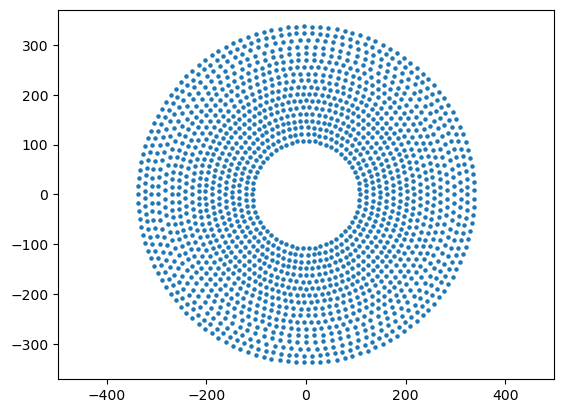

In [16]:
# 将数据转化为矩阵
data = np.array(data)
import matplotlib.pyplot as plt
# 以每行的第一列为x坐标，第二列为y坐标，绘制正方形散点图
plt.scatter(data[:, 0], data[:, 1], s = 5)
# 正比
plt.axis('equal')
plt.show()